In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

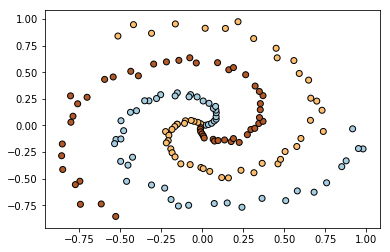

In [2]:
def generate_spiral_dataset(num_points = 50):
    X = np.zeros((num_points * 3, 2))
    Y = np.zeros((num_points * 3, 3))
    for i in range(0, num_points):
        d = (i+1) / num_points
        for j in range(3):
            X[i*3 + j, 0] = d * math.cos(2 * d * math.pi + 2 * math.pi * j / 3) + np.random.normal(0, d * 0.05)
            X[i*3 + j, 1] = d * math.sin(2 * d * math.pi + 2 * math.pi * j / 3) + np.random.normal(0, d * 0.05)
            Y[i*3 + j, j] = 1
    return X, Y

train_X, train_Y = generate_spiral_dataset()

plt.scatter(train_X[:, 0], train_X[:, 1], edgecolor = '0', c = np.argmax(train_Y, axis = 1), cmap = plt.cm.Paired)
plt.show()

In [3]:
# reference: https://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib?answertab=oldest#tab-top

def plot_decision_boundary(X, Y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    A_mesh = model(X_mesh)
    Y_mesh = np.argmax(A_mesh, axis=1)
    Y_mesh = Y_mesh.reshape(xx.shape)
    plt.contourf(xx, yy, Y_mesh, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], edgecolor = '0', c = np.argmax(Y, axis = 1), cmap = plt.cm.Paired)
    plt.show()

In [4]:
tf.reset_default_graph()

n0 = train_X.shape[1]
n1 = train_Y.shape[1]

x = tf.placeholder(tf.float32, [None, n0])
y = tf.placeholder(tf.float32, [None, n1])

W = tf.get_variable("W", shape=[n0, n1])
b = tf.get_variable("b", shape=[1, n1])
z = tf.matmul(x, W) + b
a = tf.nn.softmax(z)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [5]:
for i in range(1000):
    if i % 100 == 0:
      print(sess.run(cross_entropy, feed_dict={x: train_X, y: train_Y}))
    sess.run(train_step, feed_dict={x: train_X, y: train_Y})

1.18015
1.04279
1.02868
1.02372
1.02185
1.02112
1.02083
1.02071
1.02066
1.02064


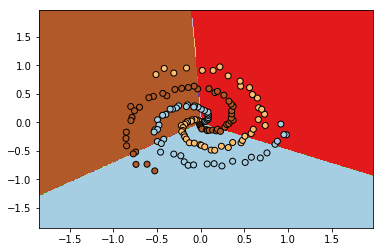

In [6]:
plot_decision_boundary(train_X, train_Y, lambda X: sess.run(a, feed_dict={x: X}))

In [67]:
sess.close()

In [63]:
tf.reset_default_graph()

n0 = train_X.shape[1]
n1 = 50
n2 = train_Y.shape[1]

lambd = 0.1

x = tf.placeholder(tf.float32, [None, n0])
y = tf.placeholder(tf.float32, [None, n2])
m = tf.cast(tf.shape(x)[0], dtype=tf.float32)

W1 = tf.get_variable("W1", shape=[n0, n1])
b1 = tf.get_variable("b1", shape=[1,  n1])
z1 = tf.matmul(x, W1) + b1
a1 = tf.nn.relu(z1)

W2 = tf.get_variable("W2", shape=[n1, n2])
b2 = tf.get_variable("b2", shape=[1,  n2])
z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.softmax(z2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z2))
loss = cross_entropy + (lambd / (2*m)) * (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2))
train_step = tf.train.AdamOptimizer(0.01).minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

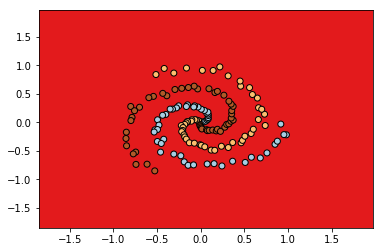

In [64]:
plot_decision_boundary(train_X, train_Y, lambda X: sess.run(a2, feed_dict={x: X}))

In [65]:
for i in range(10000):  
    if i % 1000 == 0:
        print(sess.run(cross_entropy, feed_dict={x: train_X, y: train_Y}))
    sess.run(train_step, feed_dict={x: train_X, y: train_Y})

1.44838
0.0757984
0.0688663
0.0678734
0.0674951
0.0674247
0.0672393
0.0672885
0.0672157
0.0671767


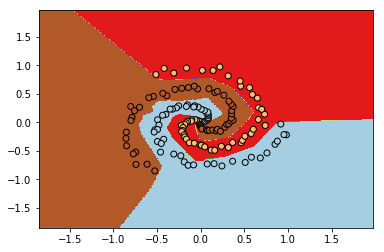

In [66]:
plot_decision_boundary(train_X, train_Y, lambda X: sess.run(a2, feed_dict={x: X}))

In [68]:
sess.close()